[View in Colaboratory](https://colab.research.google.com/github/ThreeOne31/CNN_Bird_Species_Classification/blob/master/my_cnn.ipynb)

First fork data into collab storage from github

In [1]:
!git clone https://github.com/MbeleLebohang-uct/birds-data.git



Cloning into 'birds-data'...
remote: Enumerating objects: 12013, done.
remote: Total 12013 (delta 0), reused 0 (delta 0), pack-reused 12013
Receiving objects: 100% (12013/12013), 1.07 GiB | 53.68 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Checking out files: 100% (11800/11800), done.


Then create a working directory
copy a sample of the data for quick testing

In [2]:
#!ls birds-data/images
!rm -r workingDIR
!mkdir workingDIR
!mkdir model
!cp -r birds-data/images/001.Black_footed_Albatross workingDIR
#!cp -r birds-data/images/002.Laysan_Albatross workingDIR
#!cp -r birds-data/images/003.Sooty_Albatross workingDIR
!cp -r birds-data/images/020.Yellow_breasted_Chat workingDIR
!cp -r birds-data/images/084.Red_legged_Kittiwake  workingDIR
!cp -r birds-data/images/085.Horned_Lark workingDIR


#!cp -r workingDIR/085.Horned_Lark	birds-data/images
#!ls model
#!mkdir workingDIR
#!cd birds-data/images
#!rm -r birds-data
!ls workingDIR

#!cat > model.pkl

rm: cannot remove 'workingDIR': No such file or directory
001.Black_footed_Albatross  084.Red_legged_Kittiwake
020.Yellow_breasted_Chat    085.Horned_Lark


The main code, 
all neccessary  imports 
Function definittions, compile once and run from anywhere in the notebook

In [2]:
#imports 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
import PIL.Image
import itertools

from tensorflow.python.keras.models import load_model

from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing.image import array_to_img, img_to_array, load_img

from tensorflow.python.keras import layers
from tensorflow.python.keras import Model
from tensorflow.python.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, classification_report

#=========================================================================
#                           variables
#=========================================================================
base_dir='workingDIR'
#base_dir ='birds-data/images'
class_names = np.array(os.listdir(base_dir))

#-------------------------generate data--------------------------------
#Split training and validation data by 0.8 to 0.2
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

#fetch images from base_dir in batches of 32 images
#Returns (x,y) tuple
train_generator=datagen.flow_from_directory(
    base_dir,
    subset='training',
    target_size=(150, 150),
    batch_size=32
)

validation_generator=datagen.flow_from_directory(
    base_dir,
    subset='validation',
    target_size=(150, 150),
    batch_size=32
)


#========================================================================
#                    Function Definitions 
#========================================================================
#--------------------configure model-------------------------------------
def cnn_model(Number_Hidden_ly):
  """Configures number of layers for feature learning and number of hidden
      layers. then compiles that model
  """
  # Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
  # the three color channels: R, G, and B
  img_input = layers.Input(shape=(150, 150, 3))

  # First convolution extracts 16 filters that are 3x3
  # Convolution is followed by max-pooling layer with a 2x2 window
  x = layers.Conv2D(16, 3, padding='same', activation='relu')(img_input)
  x = layers.MaxPooling2D(2)(x)

  # Second convolution extracts 32 filters that are 3x3
  # Convolution is followed by max-pooling layer with a 2x2 window
  x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
  x = layers.MaxPooling2D(2)(x)

  # Third convolution extracts 64 filters that are 3x3
  # Convolution is followed by max-pooling layer with a 2x2 window
  x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
  x = layers.MaxPooling2D(2)(x)

  # fouth convolution extracts 128 filters that are 3x3
  #Convolution is followed by max-pooling layer with a 2x2 window
  x = layers.Convolution2D(128, 3, padding='same', activation='relu')(x)
  x = layers.MaxPooling2D(2)(x)

  # Flatten feature map to a 1-dim tensor
  x = layers.Flatten()(x)

  # Create a fully connected layer with ReLU activation and 512 hidden units
  x = layers.Dense(Number_Hidden_ly, activation='relu')(x)

  # Add a dropout rate of 0.5
  #x = layers.Dropout(0.1)(x)

  # Create output layer with a single node and sigmoid activation
  output = layers.Dense(len(class_names), activation='softmax')(x)
  
  cnn_model = Model(img_input, output)
  
  return cnn_model

#------------------compile model-----------------------------------------
def compile_model():
  #Compile a model with a set learning rate and optimizer
  model.compile(loss='mean_squared_error',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

#-------------Vidualise Train and Validation-----------------------------
def plot_accloss(history):
  """This function plots accuracy and loss for both training and validation 
      per epoch, gives an idea 
  """
  # Retrieve a list of accuracy results on training and test data
  # sets for each training epoch
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  # Retrieve a list of list results on training and test data
  # sets for each training epoch
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get number of epochs
  epochs = range(len(acc))
  
  plt.figure()    # Plot training and validation accuracy per epoch
  plt.plot(epochs, acc, label='training Acc')
  plt.plot(epochs, val_acc, label='Validation Acc')
  plt.legend('training acc','Validation Acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()    # Plot training and validation loss per epoch
  plt.plot(epochs, loss, label='Training loss')
  plt.plot(epochs, val_loss, label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.figure()
  
#---------------confusion matrix plot-----------------------------------
def plot_confusion_matrix(Y_pred):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  
  cmap=plt.cm.Blues
  
  #Y_pred = model.predict_generator(validation_generator)
  y_pred = np.argmax(Y_pred, axis=1)
  cm=confusion_matrix(validation_generator.classes, y_pred)
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

  plt.imshow(cm, cmap=cmap)
  plt.grid(False)
  plt.title('Confusion Matrix')
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=45)
  plt.yticks(tick_marks, class_names,rotation=0)


  thresh = cm.max() / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], '.2f'),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

#========================================================================
#                       MAIN                                     
#=======================================================================
def main(epochs,learning_rate, Number_Hidden_ly):
  """
    This is the main function runs the rest of the program
    congifigures a model,compiles, fit model and plots metrics
  """
  model=cnn_model(Number_Hidden_ly)        #configure cnn model
  
  #Compile a model with a set learning rate, optimizer and a loss function
  model.compile(loss='mean_squared_error',optimizer=Adam(lr=learning_rate),metrics=['acc'])
  
  # Traing model
  history = model.fit_generator(train_generator,
                                steps_per_epoch=100,
                                epochs=epochs,
                                validation_data=validation_generator,
                                validation_steps=60,
                                verbose=2
                               )
  
  plot_accloss(history)     #plot acc and loss curves for training
  
  # Do prediction over validation data
  Y_pred = model.predict_generator(validation_generator, steps=len(validation_generator)) 
  plot_confusion_matrix(Y_pred)
  
  #save model
  model.save('model/my_cnn_model.h5')  # creates a HDF5 file 'my_model.h5'
  #del model  # deletes the existing model

  # returns a compiled model
  # identical to the previous one
  #model = load_model('model/my_cnn_model.h5')

  
#main(20,0.001)

Found 187 images belonging to 4 classes.
Found 45 images belonging to 4 classes.


Call main with variation of epochs, learning_rate and number of hidden layers, to see the best combination 

Epoch 1/10
 - 129s - loss: 0.1116 - acc: 0.6664 - val_loss: 0.0613 - val_acc: 0.8222
Epoch 2/10
 - 129s - loss: 0.0374 - acc: 0.8991 - val_loss: 0.0956 - val_acc: 0.7111
Epoch 3/10
 - 128s - loss: 0.0080 - acc: 0.9848 - val_loss: 0.1001 - val_acc: 0.7111
Epoch 4/10
 - 128s - loss: 0.0069 - acc: 0.9858 - val_loss: 0.0887 - val_acc: 0.8222
Epoch 5/10
 - 128s - loss: 0.0029 - acc: 0.9947 - val_loss: 0.0811 - val_acc: 0.8000
Epoch 6/10
 - 128s - loss: 3.1235e-05 - acc: 1.0000 - val_loss: 0.0942 - val_acc: 0.7556
Epoch 7/10
 - 128s - loss: 1.6844e-05 - acc: 1.0000 - val_loss: 0.1008 - val_acc: 0.7556
Epoch 8/10
 - 128s - loss: 1.1544e-05 - acc: 1.0000 - val_loss: 0.1036 - val_acc: 0.7333
Epoch 9/10
 - 129s - loss: 8.2922e-06 - acc: 1.0000 - val_loss: 0.1053 - val_acc: 0.7333
Epoch 10/10
 - 127s - loss: 6.5141e-06 - acc: 1.0000 - val_loss: 0.1065 - val_acc: 0.7333


/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:936: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:936: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:936: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matp

*************A*************
*************B*************
Epoch 1/10
 - 128s - loss: 0.1875 - acc: 0.2471 - val_loss: 0.1874 - val_acc: 0.2667
Epoch 2/10
 - 127s - loss: 0.1874 - acc: 0.2533 - val_loss: 0.1873 - val_acc: 0.2667
Epoch 3/10
 - 127s - loss: 0.1874 - acc: 0.2555 - val_loss: 0.1873 - val_acc: 0.2667
Epoch 4/10
 - 128s - loss: 0.1874 - acc: 0.2537 - val_loss: 0.1873 - val_acc: 0.2667
Epoch 5/10
 - 127s - loss: 0.1874 - acc: 0.2413 - val_loss: 0.1873 - val_acc: 0.2667
Epoch 6/10
 - 127s - loss: 0.1874 - acc: 0.2483 - val_loss: 0.1873 - val_acc: 0.2667
Epoch 7/10
 - 127s - loss: 0.1874 - acc: 0.2454 - val_loss: 0.1873 - val_acc: 0.2667
Epoch 8/10
 - 128s - loss: 0.1874 - acc: 0.2441 - val_loss: 0.1873 - val_acc: 0.2667
Epoch 9/10
 - 128s - loss: 0.1874 - acc: 0.2469 - val_loss: 0.1873 - val_acc: 0.2667
Epoch 10/10
 - 127s - loss: 0.1873 - acc: 0.2564 - val_loss: 0.1873 - val_acc: 0.2667
*************C*************
Epoch 1/10
 - 129s - loss: 0.1284 - acc: 0.5832 - val_loss: 0.098

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


*************G*************
Epoch 1/10
 - 129s - loss: 0.0997 - acc: 0.6983 - val_loss: 0.0855 - val_acc: 0.7778
Epoch 2/10
 - 128s - loss: 0.0077 - acc: 0.9864 - val_loss: 0.0762 - val_acc: 0.8000
Epoch 3/10
 - 128s - loss: 0.0025 - acc: 0.9950 - val_loss: 0.0798 - val_acc: 0.7778
Epoch 4/10
 - 127s - loss: 0.0027 - acc: 0.9946 - val_loss: 0.0818 - val_acc: 0.7778
Epoch 5/10
 - 128s - loss: 0.0025 - acc: 0.9949 - val_loss: 0.0806 - val_acc: 0.8000
Epoch 6/10
 - 126s - loss: 0.0049 - acc: 0.9885 - val_loss: 0.1758 - val_acc: 0.5556
Epoch 7/10
 - 125s - loss: 0.0225 - acc: 0.9490 - val_loss: 0.1140 - val_acc: 0.7333
Epoch 8/10
 - 125s - loss: 0.0017 - acc: 0.9956 - val_loss: 0.1091 - val_acc: 0.7333
Epoch 9/10
 - 125s - loss: 1.4370e-05 - acc: 1.0000 - val_loss: 0.1118 - val_acc: 0.7333
Epoch 10/10
 - 125s - loss: 7.7751e-06 - acc: 1.0000 - val_loss: 0.1132 - val_acc: 0.7333
*************H*************
Epoch 1/10
 - 128s - loss: 0.0853 - acc: 0.7309 - val_loss: 0.0527 - val_acc: 0.8667


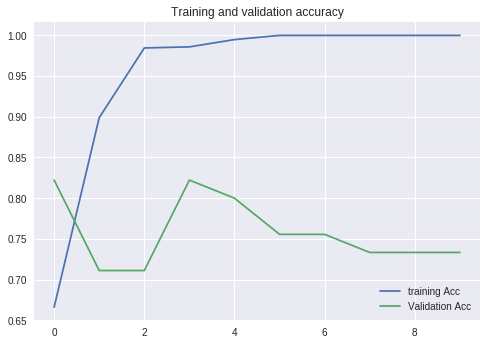

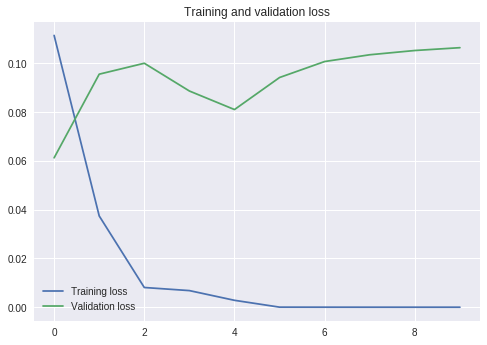

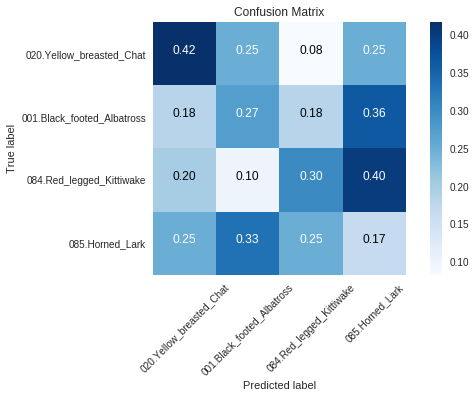

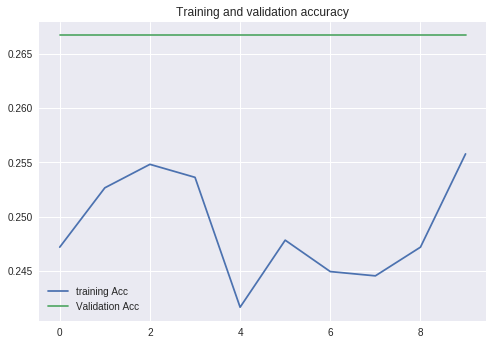

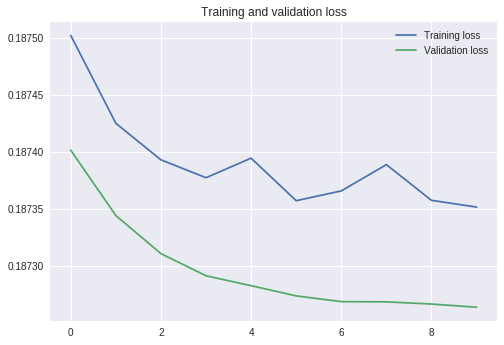

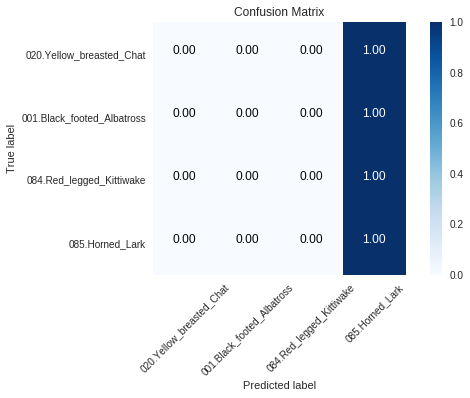

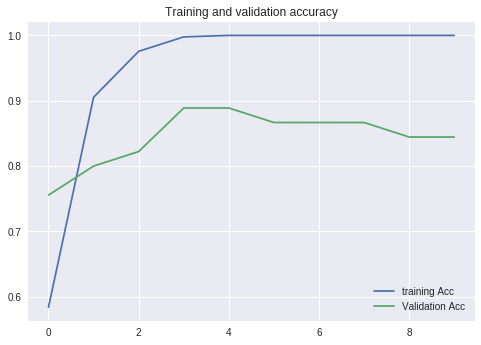

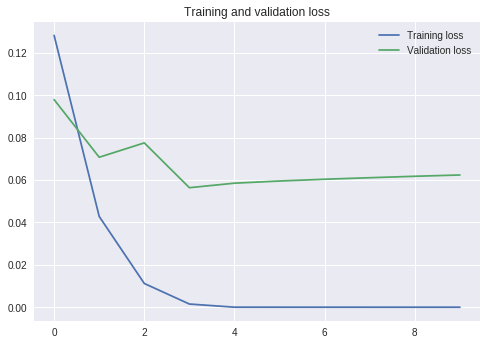

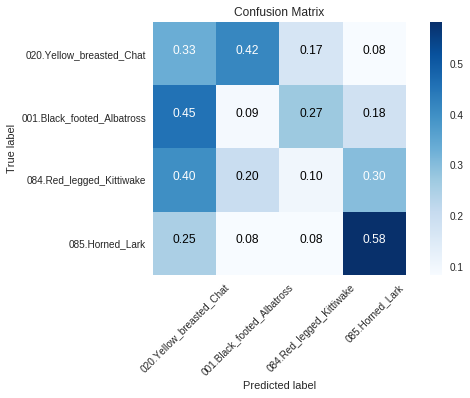

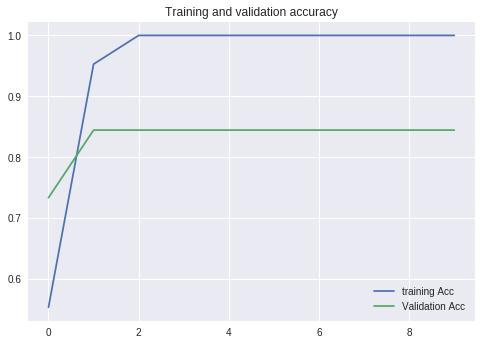

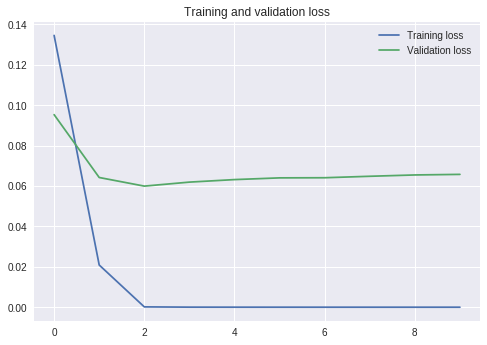

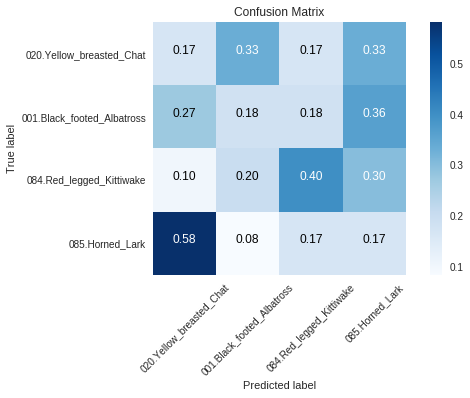

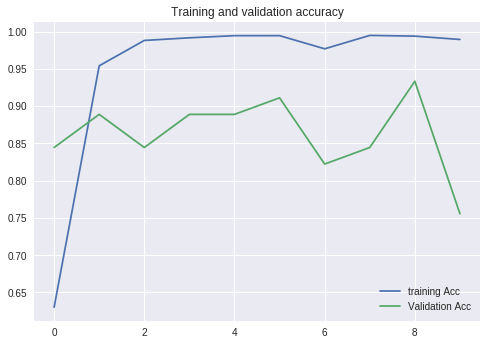

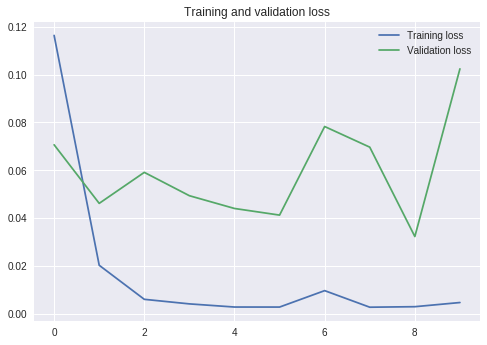

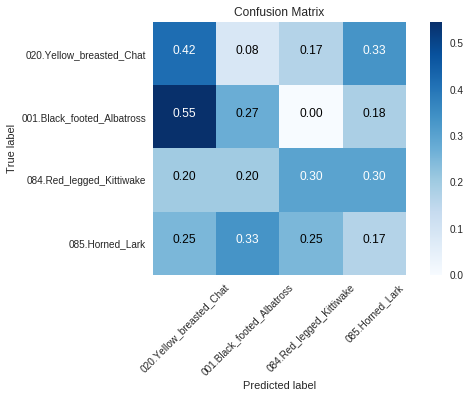

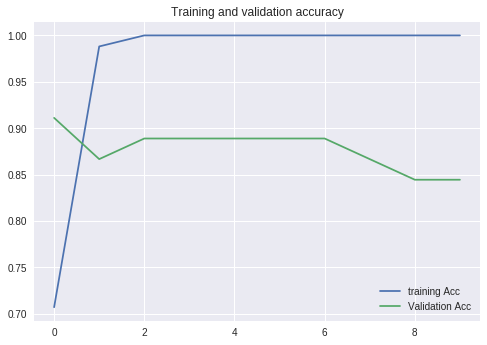

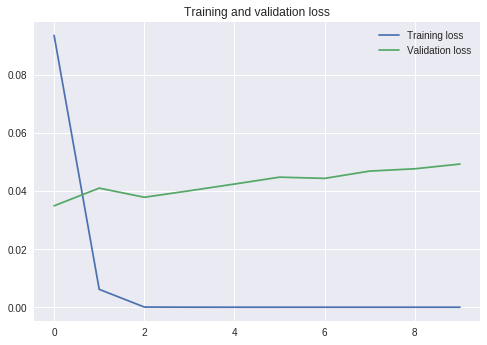

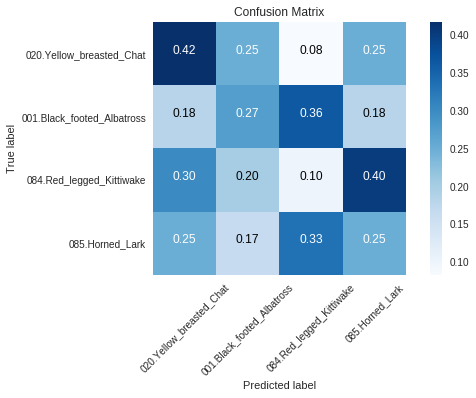

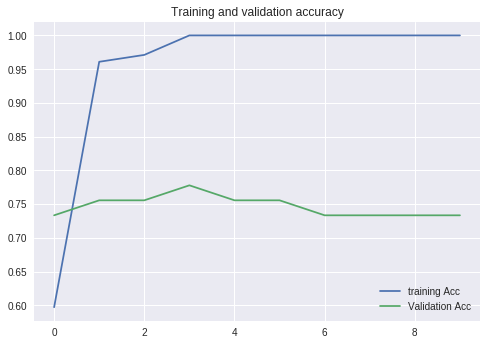

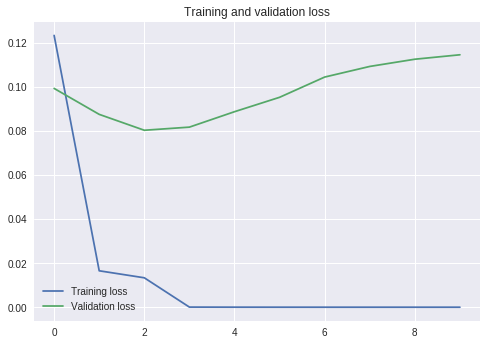

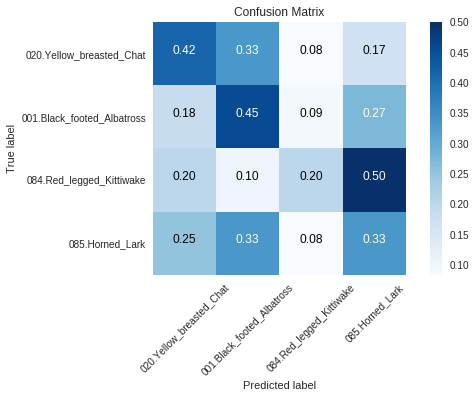

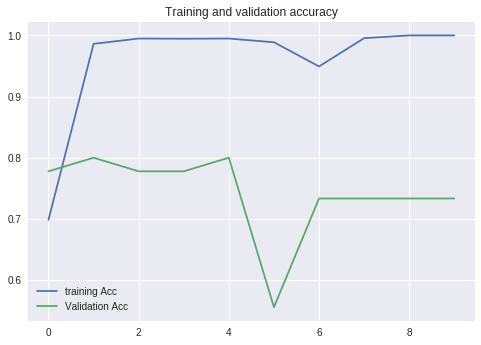

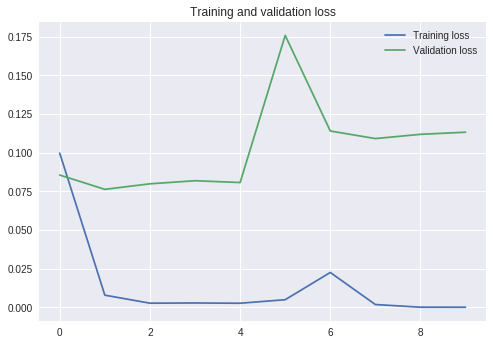

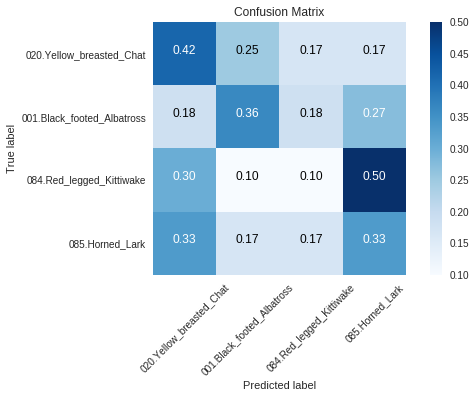

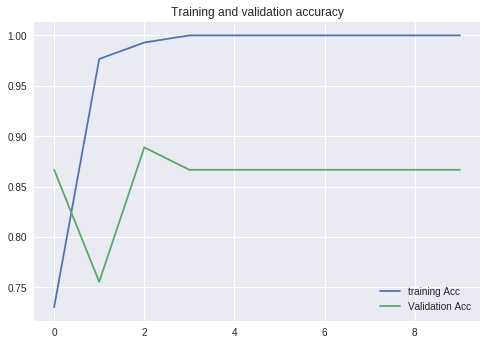

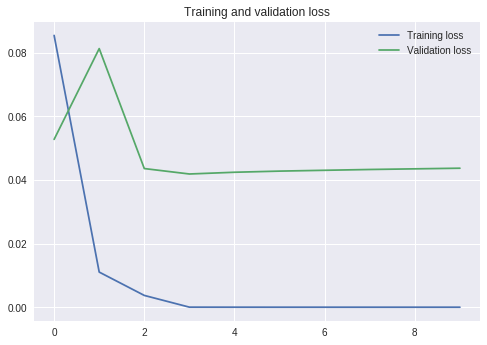

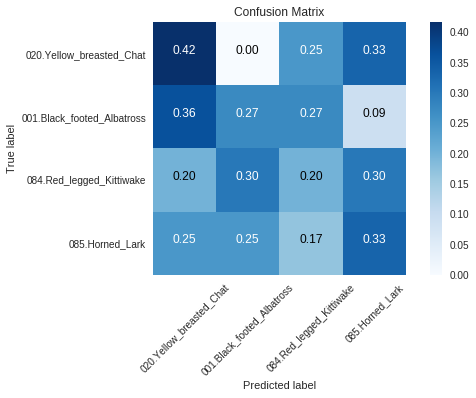

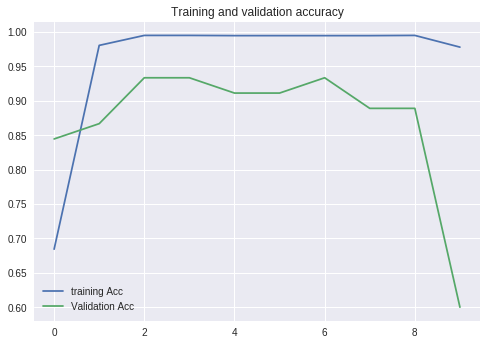

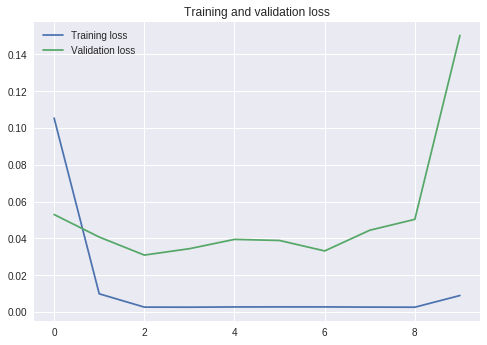

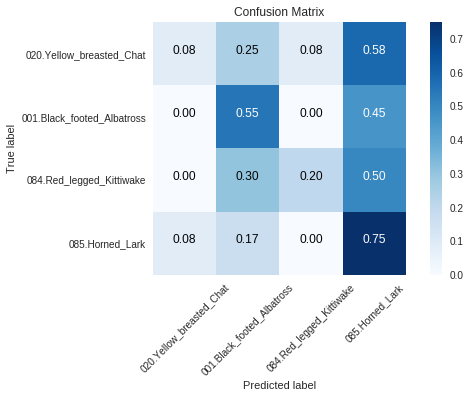

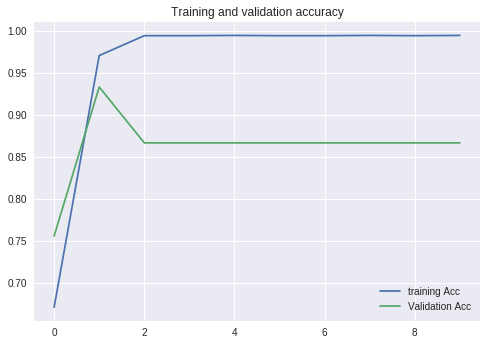

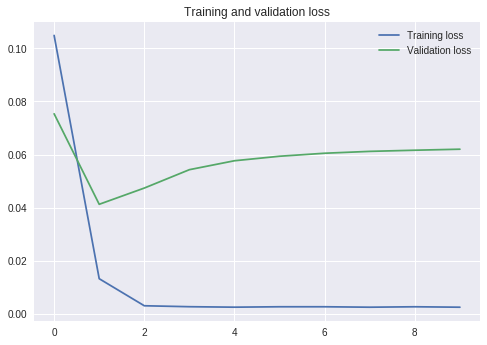

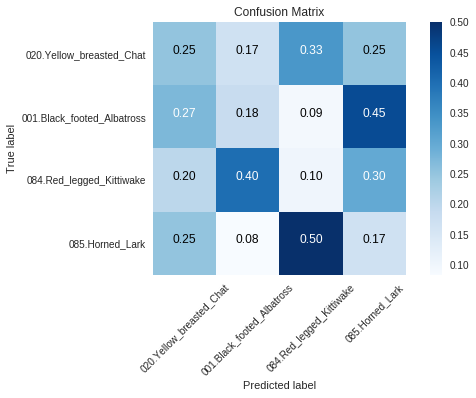

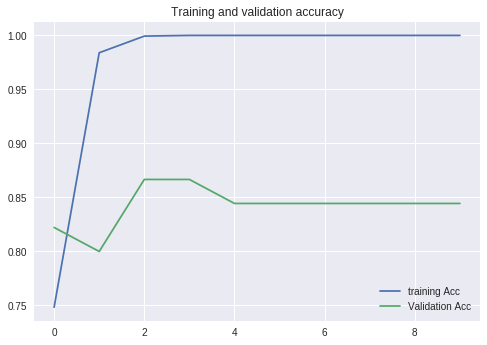

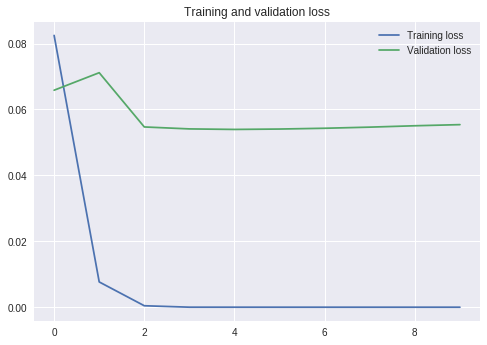

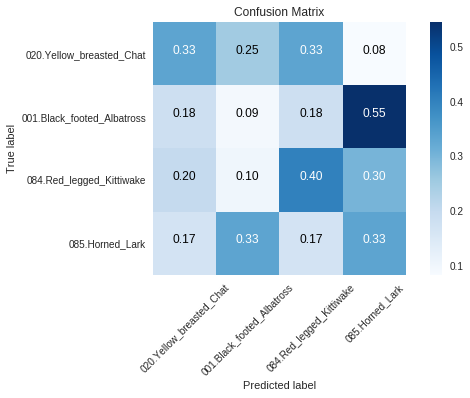

In [4]:
#main(epochs, learning_rate, NUmber of hidden layers)
main(10,0.001,5)
print("*************A*************")
#main(10,0.001,8)
print("*************B*************")
main(10,0.001,10)
print("*************C*************")
main(10,0.001,12)
print("*************D*************")
main(10,0.001,16)
print("*************D*************")
main(10,0.001,18)
print("*************E*************")
main(10,0.001,20)
print("*************F*************")
main(10,0.001,24)
print("*************G*************")
main(10,0.001,32)
print("*************H*************")
main(10,0.001,64)
print("*************I*************")
main(10,0.001,128)
print("*************J*************")
main(10,0.001,256)
print("*************K*************")
main(10,0.001,512)
print("*************L************")

In [6]:
!ls model
!du model/my_cnn_model.h5
!stat model/my_cnn_model.h5

my_cnn_model.h5
32316	model/my_cnn_model.h5
  File: model/my_cnn_model.h5
  Size: 33089592  	Blocks: 64632      IO Block: 4096   regular file
Device: 2eh/46d	Inode: 1192668     Links: 1
Access: (0644/-rw-r--r--)  Uid: (    0/    root)   Gid: (    0/    root)
Access: 2018-10-02 18:56:09.865777501 +0000
Modify: 2018-10-02 18:56:10.111778232 +0000
Change: 2018-10-02 18:56:10.111778232 +0000
 Birth: -


In [7]:
!git init

Initialized empty Git repository in /content/.git/


In [0]:
!git add 'model/my_cnn_model.h5'

Epoch 1/1
 - 111s - loss: 0.0730 - acc: 0.7343 - val_loss: 0.1301 - val_acc: 0.5778


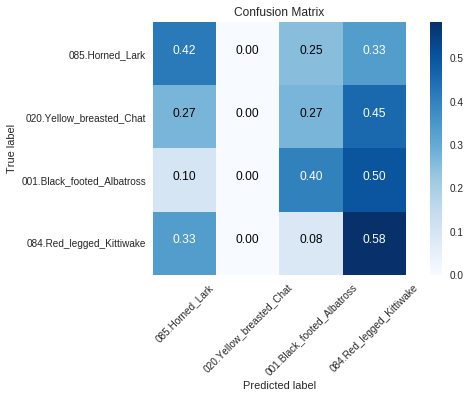

In [14]:
model = load_model('model/my_cnn_model.h5')
history = model.fit_generator(train_generator,
                                steps_per_epoch=100,
                                epochs=1,
                                validation_data=validation_generator,
                                validation_steps=60,
                                verbose=2
                               )

Y_pred = model.predict_generator(validation_generator, steps=len(validation_generator)) 
plot_confusion_matrix(Y_pred)

Epoch 1/5
 - 132s - loss: 0.0724 - acc: 0.7847 - val_loss: 0.0707 - val_acc: 0.8222
Epoch 2/5
 - 132s - loss: 0.0036 - acc: 0.9933 - val_loss: 0.0458 - val_acc: 0.8667
Epoch 3/5
 - 131s - loss: 3.1630e-05 - acc: 1.0000 - val_loss: 0.0409 - val_acc: 0.8889
Epoch 4/5
 - 131s - loss: 8.3892e-06 - acc: 1.0000 - val_loss: 0.0407 - val_acc: 0.8889
Epoch 5/5
 - 132s - loss: 5.8157e-06 - acc: 1.0000 - val_loss: 0.0406 - val_acc: 0.8889


/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:936: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:936: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:936: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matp

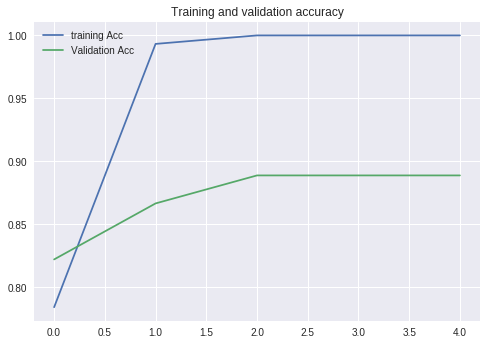

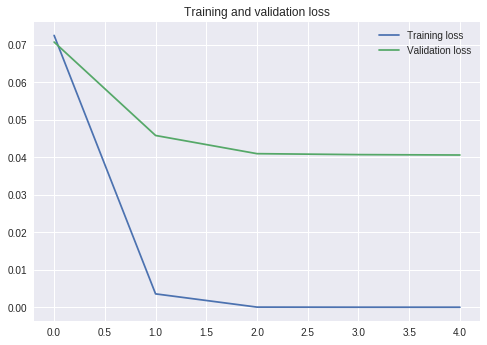

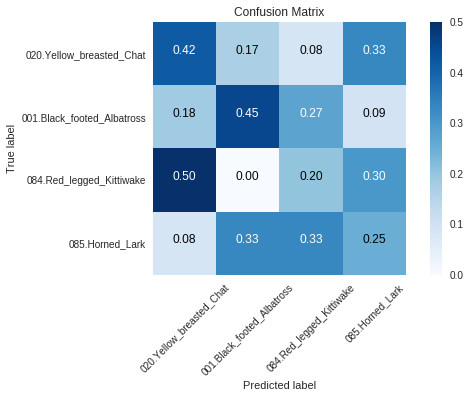

In [4]:
main(5,0.001,256)

In [20]:
model = load_model('model/my_cnn_model.h5')
img_array = []
for cat in class_names:
  img_path=os.path.join(base_dir,cat)
  for img in os.listdir(img_path):
      full_path=os.path.join(img_path,img)
      pic = load_img(full_path, target_size=(150, 150))    # this is a PIL image
      x = img_to_array(pic)                                # Numpy array with shape (150, 150, 3)
      #x=np.array(x)
      #x=x.flatten()
      #x=x.reshape(-1,1)
      x=np.expand_dims(x, axis=0)
      y_predict=model.predict(x)
      print("*******  ",y_predict)
      
      break
  break

*******   [[0. 1. 0. 0.]]
